<a href="https://colab.research.google.com/github/bikrambiswajit/machine_learning/blob/main/Lok_Sabha_Election_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Lok Sabha/LS_2.0.csv')

In [4]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


Understanding the Data

In [5]:
df.shape
df.columns= df.columns.str.replace("\n"," ")

In [6]:
df.describe()

,WINNER,AGE,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [7]:
df1 = df[df['PARTY']!= 'NOTA']
#Removed as there were Null values associated

#Insights From the Data

Visualizing the Constituencies per State

In [8]:
constituencies_per_state = df.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY',ascending = True)
fig = px.bar(constituencies_per_state, x='STATE', y='CONSTITUENCY', color='CONSTITUENCY', height=600)
fig.show()

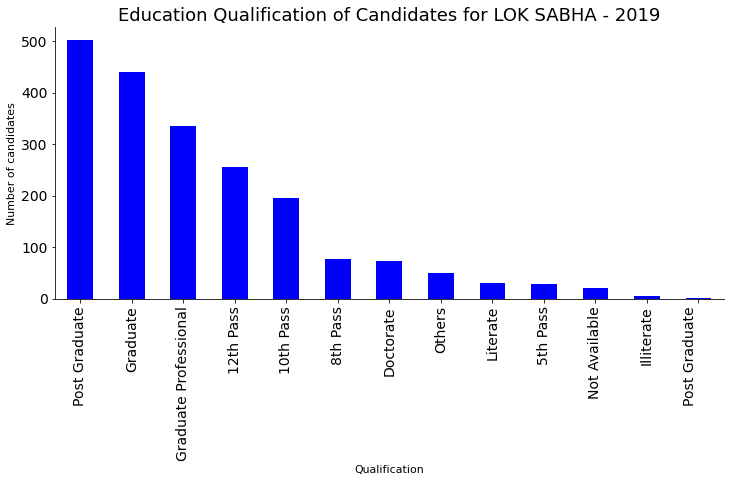

In [9]:
#Educational Qualification
Edu = df1.EDUCATION.value_counts().plot.bar(
    figsize=(12,5),
    color = 'blue',
    fontsize =14
)

Edu.set_title('Education Qualification of Candidates for LOK SABHA - 2019',fontsize=18)
Edu.set_ylabel('Number of candidates',fontsize=11)
Edu.set_xlabel('Qualification',fontsize=11)
sns.despine()

Seats Constested By Parties

Text(0.5, 0, 'Political Parties')

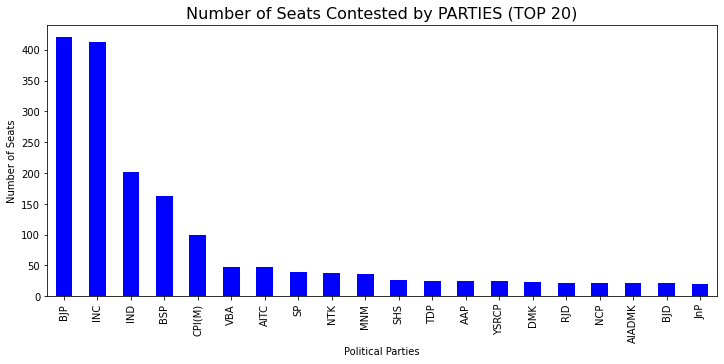

In [10]:
Scon = df1.PARTY.value_counts().head(20).plot.bar(
    figsize=(12,5),
    color='Blue',
    fontsize=10
)
Scon.set_title('Number of Seats Contested by PARTIES (TOP 20)',fontsize=16)
Scon.set_ylabel('Number of Seats',fontsize=10)
Scon.set_xlabel('Political Parties',fontsize=10)

Seat Conversion by Parties

In [11]:
def seat_conversion(party):
  seat_contested=df1[df1['PARTY']==party].shape[0]
  seat_won = df[(df['PARTY']==party) & (df['WINNER'])].shape[0]
  if seat_contested!=0:
    conversion= (seat_won/seat_contested)*100
  else:
    conversion = 0
  return conversion

In [12]:
party_win_percent = {}

for party in df['PARTY'].unique():
    party_win_percent[party] = seat_conversion(party)
    
party_win_percent_series = pd.Series(party_win_percent)  

party_win_percent_series

BJP      71.428571
TRS      52.941176
INC      12.590799
NOTA      0.000000
BSP       6.748466
           ...    
IPFT      0.000000
JKNPP     0.000000
DSSP      0.000000
AHNP      0.000000
PHJSP     0.000000
Length: 133, dtype: float64

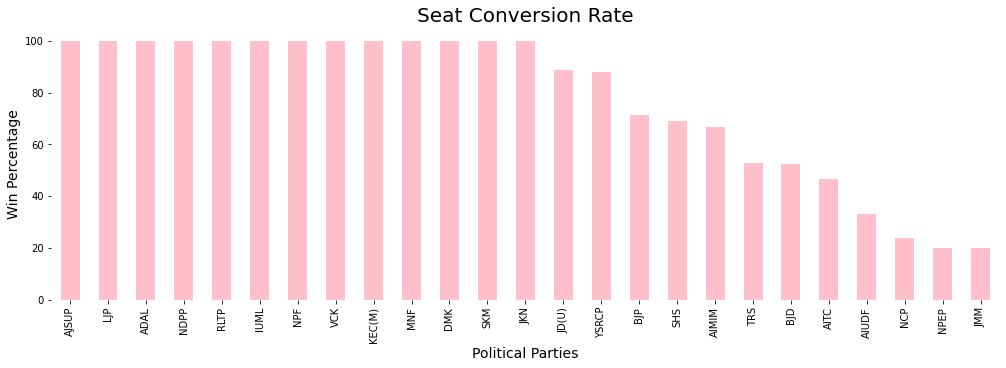

In [13]:
win_per=party_win_percent_series.sort_values(ascending=False).head(25).plot.bar(
figsize=(17,5),
color='pink'    
)

win_per.set_title('Seat Conversion Rate',fontsize=20)
win_per.set_xlabel('Political Parties',fontsize=14)
win_per.set_ylabel('Win Percentage',fontsize=14)

sns.despine(bottom=True,left=True)

Vote Share

In [17]:
vote_share_top5 = df.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()
def vote_share(row):
    if row['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return row['PARTY']
df['Party New'] = df.apply(vote_share,axis =1)
counts = df.groupby('Party New')['TOTAL VOTES'].sum()
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='black', width=1)))
layout = go.Layout(title='Partywise Vote Share')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

#Winner Prediction

In [18]:
df = df[df['PARTY']!= 'NOTA']
df[['ASSETS2','ASSETS_VALUE']] = df['ASSETS'].str.split('~',expand=True)
df.drop(['ASSETS2'],axis =1,inplace=True)
df = df[df['ASSETS_VALUE'].notnull()]
def asset_range(row):
    if row['ASSETS_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['ASSETS_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['ASSETS_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'
df['ASSETS_RANGE'] = df.apply(asset_range,axis =1)

df[['LIABILITY2','LIABILITY_VALUE']] = df['LIABILITIES'].str.split('~',expand=True)
df.drop(['LIABILITY2'],axis =1,inplace=True)
df = df[df['LIABILITY_VALUE'].notnull()]

def liability_range(row):
    if row['LIABILITY_VALUE'].endswith('Crore+'):
        return 'Crore+'
    elif row['LIABILITY_VALUE'].endswith('Lacs+'):
        return 'Lakh+'
    elif row['LIABILITY_VALUE'].endswith('Thou+'):
        return 'Thousand+'
    else:
        return 'NAN'
df['LIABILITY_RANGE'] = df.apply(liability_range,axis =1)

In [20]:
df1 = df[['STATE','CONSTITUENCY','WINNER','Party New','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS_RANGE','LIABILITY_RANGE']]
cat_cols = ['STATE','CONSTITUENCY','Party New','SYMBOL','GENDER','CATEGORY','EDUCATION','ASSETS_RANGE','LIABILITY_RANGE']
num_cols = ['CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS']

In [23]:
dataset = pd.get_dummies(df1, columns = cat_cols)
standardScaler = StandardScaler()
columns_to_scale = num_cols
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,WINNER,CRIMINAL CASES,AGE,TOTAL VOTES,TOTAL ELECTORS,STATE_Andaman & Nicobar Islands,STATE_Andhra Pradesh,STATE_Arunachal Pradesh,STATE_Assam,STATE_Bihar,...,EDUCATION_Post Graduate,EDUCATION_Post Graduate\n,ASSETS_RANGE_Crore+,ASSETS_RANGE_Lakh+,ASSETS_RANGE_NAN,ASSETS_RANGE_Thousand+,LIABILITY_RANGE_Crore+,LIABILITY_RANGE_Lakh+,LIABILITY_RANGE_NAN,LIABILITY_RANGE_Thousand+
0,1,6.573192,-0.030456,0.321841,-0.541152,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,-0.191676,0.138131,0.093010,-0.541152,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0,0.198605,-0.030456,0.075128,-0.541152,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0.458792,0.475303,1.374956,0.871231,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0,-0.191676,-0.451921,0.548309,0.871231,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [27]:
given = dataset.drop(['WINNER'], axis=1)
results = dataset['WINNER']
results.head()

0    1
1    0
2    0
4    1
5    0
Name: WINNER, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(given,results,test_size=0.2)

In [33]:
len(X_test)

398

In [64]:
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=60)

In [65]:
model.score(X_test, Y_test)

0.9045226130653267

Trying for Better Accuracy

In [66]:
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)

In [68]:
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9095477386934674

In [71]:
from sklearn.ensemble import AdaBoostClassifier
Adamodel = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model = Adamodel.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9296482412060302